In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
import pylab as plt
import seaborn as sns

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2598 - accuracy: 0.9239
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1041 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0711 - accuracy: 0.9781


In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9677
0.10718332231044769 0.9677000045776367


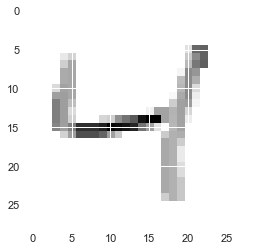

In [16]:
# sns.set()
plt.imshow(x_train[2], cmap=plt.cm.binary)

In [21]:
model.save("num_detector.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_detector.model\assets


In [22]:
new_model = tf.keras.models.load_model("num_detector.model")

In [27]:
predictions = new_model.predict(x_test)

5


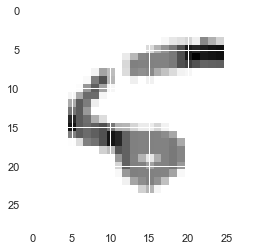

In [42]:
import numpy as np
n = 8
print(np.argmax(predictions[n]))
plt.imshow(x_test[n], cmap=plt.cm.binary)